<a href="https://colab.research.google.com/github/rileyseefeldt/MAT-422/blob/main/HW3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HW 3.2 Continunity and Differentiation

##3.2.1 Limits and Continuity

Key Terms:

Limit of a function:

Let f: D->R be a real valued function. Then f has a limit L ∈ R if, ∀ ε > 0, ∃ δ > 0 such that whenever ∣x − a ∣<δ, | f (x) − L| < ε.

written as:

lim
x→a f (x) = L.


Continuity:

Let f: D->R be a real valued function.Then f is considered continuous if: ∀ y ∈ D, ∀ ε > 0, ∃ δ > 0 such that whenever ∣ x − y ∣ < δ, | f(x) − f(y)| < ε.

Or:

lim
x→a f (x) = f (a).

Composition of Continuous functions:

The composition of two functions f,g (g o f) is continuous at x0 if f is continuous at x0 and g is continuous at f(x0).

Extremum:

A point where a function reaches a maximum or minimum value.

Extreme Value:

A point where a function reaches an absolute maximum or minimum value.

In [69]:
#Example of limits and continuity
import numpy as np

def f(x):
  try:
    return np.sin(1/x) #returns value of y for sin(1/x)
  except ZeroDivisionError:
    print("Function Not Defined at x=", x)#prints error if function is not defined at x
    return None

def limit(f, a): #calculates limit of f at a
  h = 0.00000000001 #choosing an arbitrarily small h
  left_limit = f(a - h)#evaluates limit approaching from left
  right_limit= f(a + h)#evaluates limit approaching from right
  return left_limit, right_limit

def continuous(f, a): #determines continuity of f at a
  left_limit,right_limit = limit(f,a)
  if left_limit is None or right_limit is None: #if f is undefined at the limit returns false
    return False
  if(np.isclose(left_limit,right_limit)):
    #checking if left and right limits are arbitrarily close
    return np.isclose(left_limit, f(a))
    #checking if limit and function value are arbirarily close
    #returns true if limx->a = f(a)
  return False

def tryContinuity(f,a):
  if(continuous(f,a)):
    print("Function is continuous at x =", a)
  else:
    print("Function is not continuous at x =", a)

print("Consider the function f: D-R, f = sin(1/x)")
tryContinuity(f,1)
tryContinuity(f,0)
print("Sin(1/x) is not continuous at x=0 because the left and righthand limits do not exist")


Consider the function f: D-R, f = sin(1/x)
Function is continuous at x = 1
Function is not continuous at x = 0
Sin(1/x) is not continuous at x=0 because the left and righthand limits do not exist


##3.2.2 Derivatives

key terms

Derivative: Let f: D -> R where D ⊆ R and let x0 ∈ D, then the derivative f'(x0) equals:

f'(x) =  lim h→0 (f(x0 + h) − f(x0)) / h

if the limit exists

Interior point:

A point a in the domain of function f is considered an inerior point if:

a. For δ>0, there exists an open interval I = (a-δ,a+δ) such that I exists in the functions domain.

b. the function is derivable at x = a

Rolles Theorem:

Suppose f: |a,b| -> R is a continuous function and is derivable on (a,b). If f(a)=f(b), then there exists a c∈(a,b), such that f'(c) = 0

Mean Value Theorem:

Suppose f: |a,b| -> R is a continuous function and is derivable on (a,b). Then there exists a c∈(a,b), such that: f'(c) = (f(b) - f(a))/(b-a)

Partial Derivative:

Let f : D → R where D ⊆ Rd and let x0 ∈ D be an interior point of D. Then the partial derivative of f at x0 with respect to xi is:

∂f(x0)/∂xi = lim h→0 (f(x0 + hei) − f(x0)) / h

if the limit exists

Chain Rule:

Let f : D1 → Rm, where D1 ⊆ Rd , and let g : D2 → Rp, where D2 ⊆ Rm. Assume that f is continuously differentiable at x0, an interior point of D1, and that g is continuously differentiable at f(x0), an interior point of D2. Then

Jg◦f(x0) = Jg(f(x0)) Jf(x0)

In [70]:
#Derivatives example mean value theorem

def f(x): #defines function 5x^3 +4x^2 -x
  try:
    return 5*x**3 + 4*x**2 - x #returns value of y
  except ZeroDivisionError:
    print("Function Not Defined at x=", x)#prints error if function is not defined at x
    return None

def dx(f,x): #defines derivative function
  h = 0.000000001 #choosing a arbitrarily small h to find limit
  try:
    return ((f(x+h)-f(x))/h)
  except ZeroDivisionError:
    print("Derivative Not Defined at x=", x)#prints error if function is not defined at x
    return None

def continuousOverInterval(f,a,b): #checks for continuity over an interval
  values = np.linspace(a,b,1000) #creates 1000 random points between a and b
  #although this will only work for relatively small intervals because of the amount of samples
  for i in values:
    if(continuous(f,i) == False):
      #if any of these values are not continuous it returns false
      return False
  #if all of these are true the function is continuous over the interval
  return True

def MVT(f,a,b):
  if(continuousOverInterval(f,a,b)):#makes sure f is continuous over interval (a,b)
    slope = (f(b)- f(a))/(b-a) #mean slope
    values = np.linspace(a,b,1000)#creates 1000 random points between a and b
    for i in values:
      if(np.isclose(dx(f,i),slope,0.01)): #finding an i in (a,b) that equals mean slope
        return i
  else:
    print("Function not continuous cannot use MVT")
    return None

print("Consider the funciton f(x) = 5x^3 +4x^2 -x on the interval (0,6)")
print("The value  c∈(a,b), such that f'(c) equals the mean slope is x=" , MVT(f,0,6))

Consider the funciton f(x) = 5x^3 +4x^2 -x on the interval (0,6)
The value  c∈(a,b), such that f'(c) equals the mean slope is x= 3.4174174174174174


##3.2.3 Taylor’s Theorem

Definition:

Let f : D → R where D ⊆ R. Suppose f has a m times continuous derivative on [a, b]. Then

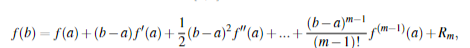


This theory provides a way to approximate a function as a polynomial, which is easier to work with than the original function  

Consider the function f(x) = e^x. The following are taylor approximations of the function:


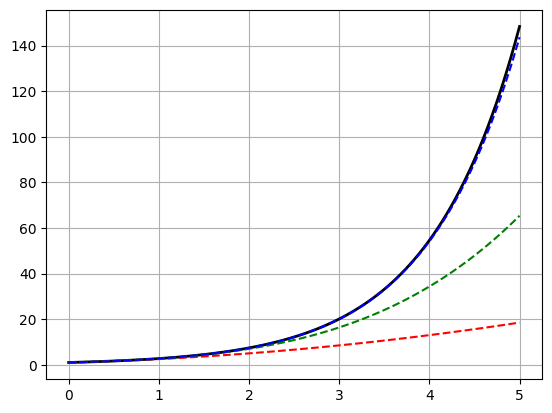

In [71]:
#Taylor's Theorem Example
import matplotlib.pyplot as plt
import math

def f(x): #using f(x) = e^x because it's simple to take multiple derivatives of the function
  try:
    return np.exp(x) #returns value of y
  except ZeroDivisionError:
    print("Function Not Defined at x=", x)#prints error if function is not defined at x
    return None

def taylor(x,n):#calculate taylor function for x values up to n terms
  #note: this will only work for f(x) = e^x because f'(x) = e^x
  amount = 0
  for i in range(n):
    amount += (x**i)/math.factorial(i)#calculates each term in the taylor series of e^x
  return amount

def taylorApprox(values,n):
  tSeries = np.zeros(len(values)) #creating empty array which will hold the approximation
  for i in range(len(values)):
    tSeries[i] = taylor(values[i],n) #adding taylor approximation values into array
  return tSeries

values = np.linspace(0,5,100)
fValues = f(values)
approximation1 = taylorApprox(values,3)#Taylor approximation with 3, 5, and 10 terms
approximation2 = taylorApprox(values,5)
approximation3 = taylorApprox(values,10)

print("Consider the function f(x) = e^x. The following are taylor approximations of the function:")

#plotting result data. dotted lines are approximations solid is the actual values
plt.plot(values, fValues, label="actual values", color='black', linewidth=2)
plt.plot(values, approximation1, label="3 term approximation", linestyle='--', color='red')
plt.plot(values, approximation2, label="5 term approximation", linestyle='--', color='green')
plt.plot(values, approximation3, label="10 term approximation", linestyle='--', color='blue')

plt.grid(True)
plt.show()


At the start of the function, all of the approximations are accurate. However, as the x value increases they start to become less accurate. The lower term approximations are less accurate than the higher ones